# (프로젝트) 모두카페 꼼꼼히 살펴보기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [2]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


# 오류 디버깅 해결 결과
### 기존 코드
```python
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',style='darkgrid', palette='pastel', font='Malgun Gothic', rc=custom_params)
```

### 문제점
기존코드로 한글화 패치를 진행한 결과, 주피터 노트북에서는 해당 코드가 적용되지 않아 위의 블록같이 수정하여 문제를 해결하였음

In [3]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [4]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [5]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [6]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [7]:
# itementry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


## 1. 월별 매출액 추세 분석하기

In [8]:
# temp_var 변수 지정하기
temp_var = sales_data.copy()

# date(년도-월) 열 지정하기
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var.head(5)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [9]:
# 결제금액 , 지우기
temp_var['결제금액'] = sales_data['결제금액'].str.replace(',','')

# 결제금액 숫자 형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype('int')

# 결제금액을 날짜 기준으로 집계
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()

In [10]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

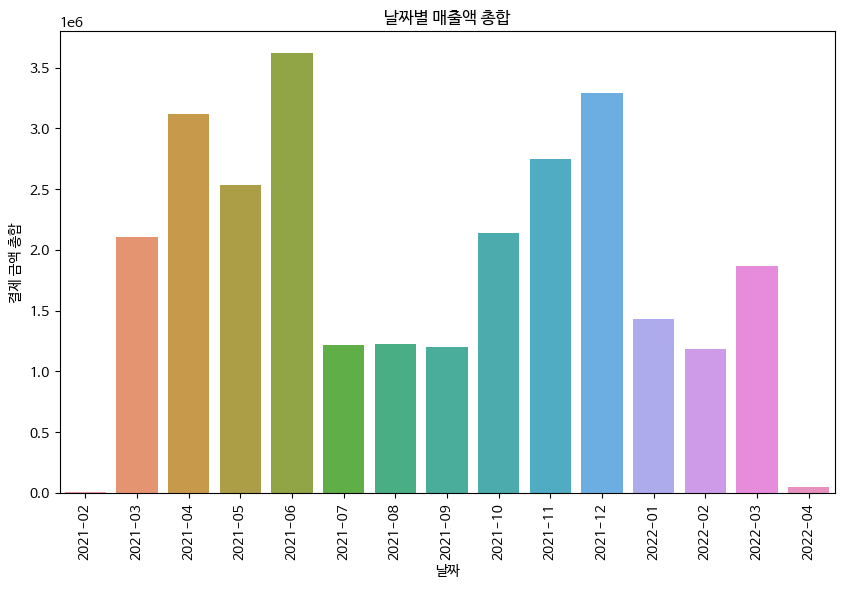

In [11]:
# 시각화 하기
plt.figure(figsize = (10, 6))
sns.barplot(data = payment_data.reset_index(), x = "date", y = "결제금액")
plt.xlabel("날짜")
plt.ylabel("결제 금액 총합")
plt.title("날짜별 매출액 총합")
plt.xticks(rotation = 90)
plt.show()

### 분석결과
- 2021-07 ~ 2021-09 : 대학생들이 방학이므로 계절학기를 듣는 인원으로 제한되어서 이용률이 적음
- 2021-03 ~ 2021-06, 2021-10 ~ 2021-12 : 대학생 학기중이므로 이용률이 큼

## 2. 가장 인기 있는 음식/음료

In [12]:
# temp_var 변수 저장
temp_var = temp_var[temp_var['판매수량'] > -1]

# 상품별로 집계하기
items_count = temp_var['상품명'].value_counts()

# 데이터 프레임으로 변환하기
items_count = pd.DataFrame(items_count)

items_count = items_count.head(10)

items_count

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


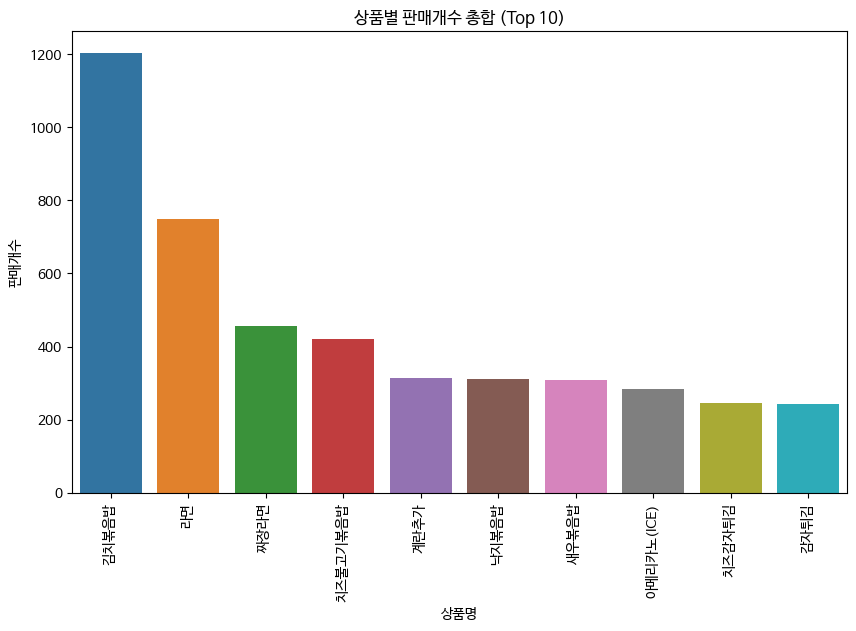

In [13]:
# 시각화 하기
plt.figure(figsize = (10, 6))
sns.barplot(data = items_count.reset_index(), x = items_count.index, y = "상품명")
plt.xlabel("상품명")
plt.ylabel("판매개수")
plt.title("상품별 판매개수 총합 (Top 10)")
plt.xticks(rotation = 90)
plt.show()

In [14]:
# temp_var 판매금액열을 상품 기준으로 집계
items_payment = temp_var['결제금액'].groupby(temp_var['상품명']).sum()

# 상위 10개 이므로 내림차순 정렬
items_payment = items_payment.sort_values(ascending = False)

items_payment = items_payment.head(10)

items_payment

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: 결제금액, dtype: int64

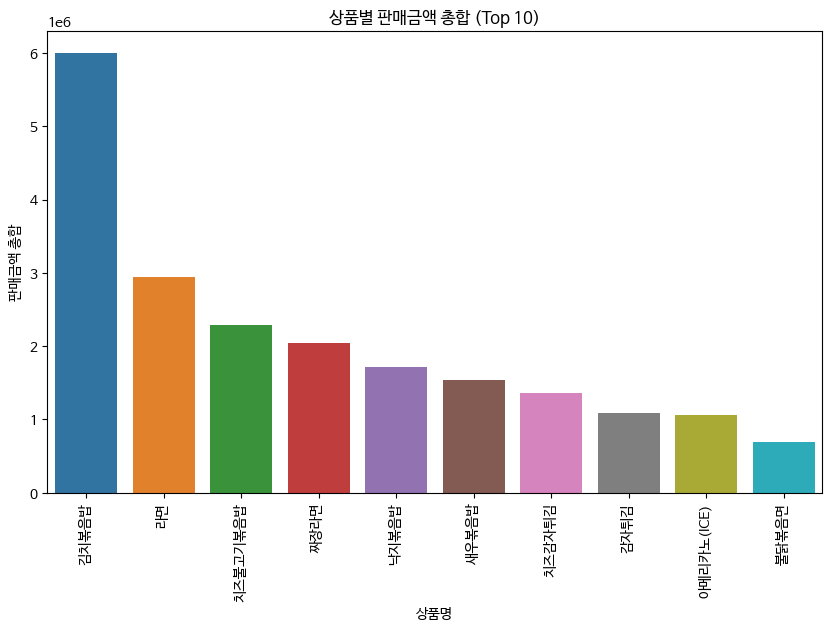

In [15]:
# 시각화 하기
plt.figure(figsize = (10, 6))
sns.barplot(data = items_payment.reset_index(), x = "상품명", y = "결제금액")
plt.xlabel("상품명")
plt.ylabel("판매금액 총합")
plt.title("상품별 판매금액 총합 (Top 10)")
plt.xticks(rotation = 90)
plt.show()

### 분석 결과
- 상품별 판매개수와 총 판매금액을 보았을때 밥류 상위 Top 10에 많이 존재하는 것으로 분석되었다.
- 세트 메뉴를 만들어 밥과 음료를 같이 파는 전략도 좋을 것 같다.

## 3.  가장 많이 팔린 입장권 종류

In [16]:
# temp_var 변수 저장
temp_var = entry_data.copy()

temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [17]:
# 요금제명 기준으로 판매금액 총합 집계
tickets_payment = temp_var['금액'].groupby(temp_var['요금제명']).sum()

# 상위 10개 이므로 내림차순 정렬
tickets_payment = tickets_payment.sort_values(ascending = False)

tickets_payment = tickets_payment.head(10)

tickets_payment

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

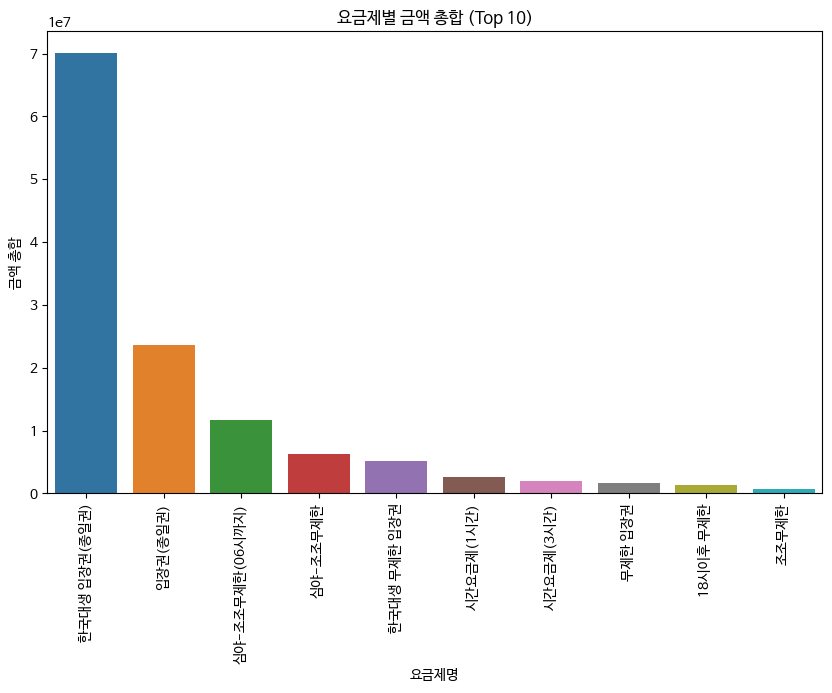

In [18]:
# 시각화 하기
plt.figure(figsize = (10, 6))
sns.barplot(data = tickets_payment.reset_index(), x = "요금제명", y = "금액")
plt.xlabel("요금제명")
plt.ylabel("금액 총합")
plt.title("요금제별 금액 총합 (Top 10)")
plt.xticks(rotation = 90)
plt.show()

### 분석결과
- 한국대생 입장권이 가장 많은 비율을 차지한 것으로 보아 한국대 앞에 있는 카페로 추측된다.
- 단골 코드를 만들어 쿠폰을 제공하는 등의 프로모션을 만든다면 단골 층 확보에 도움이 될 것 같다.
- 방학기간인 계절학기에 수요가 적기 때문에 할인이나, 서비스 제공을 통해 방문률은 높인다.

## 내가 정의한 문제 해결하기
## 최우수 고객 선정하기 (입장권 지불 가격 + 음식/음료 지불 가격을 기준으로 산정)

In [19]:
# 고객 입장 데이터 중복 확인하기 
entry_data.duplicated().value_counts()

False    19321
True      3234
dtype: int64

In [20]:
# 고객 입장 데이터 중복 제거하기
entry_payment = entry_data.copy()
entry_payment.drop_duplicates(inplace = True)
print(f"중복 제거 전 고객 입장 데이터 수 {len(entry_data)}")
print(f"중복 제거 후 고객 입장 데이터 수 {len(entry_payment)}")

# 무료 입장 데이터 제거하기
entry_payment = entry_payment[entry_payment['금액'] != 0]

# 각 고객이 지불한 입장 금액 총합 계산
entry_payments = entry_payment['금액'].groupby(entry_payment['고객']).sum()

# 번호가 없는 customer 제거
entry_payments.drop('customer', inplace = True)

entry_payments.head(5)

중복 제거 전 고객 입장 데이터 수 22555
중복 제거 후 고객 입장 데이터 수 19321


고객
customer010407     7000
customer014003     6000
customer014109     2500
customer016604     5000
customer017109    11500
Name: 금액, dtype: int64

In [21]:
# 음식/음료 판매 데이터 중복 확인하기 
sales_data.duplicated().value_counts()

False    6671
True      434
dtype: int64

In [22]:
# 음식/음료 판매 데이터 중복 제거하기
sales_payment = sales_data.copy()
sales_payment.drop_duplicates(inplace = True)
print(f"중복 제거 전 고객 음식/음료 판매 데이터 수 {len(sales_data)}")
print(f"중복 제거 후 고객 음식/음료 판매 데이터 수 {len(sales_payment)}")

# sales_payment의 결제금액에 포함된 쉼표(,) 지우기
sales_payment['결제금액'] = sales_payment['결제금액'].str.replace(",","")

# sales_payment의 결제금액을 숫자형태로 바꾸기
sales_payment['결제금액'] = sales_payment['결제금액'].astype(int)

# 각 고객이 지불한 음식/음료 금액 총합 계산
sales_payments = sales_payment['결제금액'].groupby(sales_payment['고객']).sum()

sales_payments.head(5)

중복 제거 전 고객 음식/음료 판매 데이터 수 7105
중복 제거 후 고객 음식/음료 판매 데이터 수 6671


고객
customer016004     4000
customer111111     4000
customer200167     9000
customer200188     8500
customer200285    52000
Name: 결제금액, dtype: int64

In [23]:
# merge를 위해 데이터 프레임 형태로 변환
df_entry_payments = entry_payments.reset_index(name = "입장권 결제금액")
df_sales_payments = sales_payments.reset_index(name = "음식/음료 결제금액")

# '고객' 열을 기준으로 두 데이터셋을 병합 (left join)
merged_data = df_entry_payments.merge(df_sales_payments, on='고객', how='left').set_index("고객")
merged_data.head()

,입장권 결제금액,음식/음료 결제금액
고객,,
customer010407,7000,NaN
customer014003,6000,NaN
customer014109,2500,NaN
customer016604,5000,NaN
customer017109,11500,NaN


In [24]:
# 결측치 확인
print(merged_data.isna().sum())

# 결측치 0으로 채우기
merged_data.fillna(0, inplace = True)

# 음식/음료 결제금액 정수형태로 변환
merged_data['음식/음료 결제금액'] = merged_data['음식/음료 결제금액'].astype(int)

입장권 결제금액         0
음식/음료 결제금액    3561
dtype: int64


In [25]:
# 총 결제 금액 구하기
merged_data['총 결제금액'] = merged_data['입장권 결제금액'] + merged_data['음식/음료 결제금액']

merged_data.head()

,입장권 결제금액,음식/음료 결제금액,총 결제금액
고객,,,
customer010407,7000,0,7000
customer014003,6000,0,6000
customer014109,2500,0,2500
customer016604,5000,0,5000
customer017109,11500,0,11500


In [26]:
# 최우수 고객 선정(상위 100명)
ranking = merged_data.sort_values('총 결제금액', ascending = False)

print("전체 고객 수 :",ranking.shape[0])

# 상위 100명 고객 출력
ranking = ranking.head(100)

ranking

전체 고객 수 : 5365


,입장권 결제금액,음식/음료 결제금액,총 결제금액
고객,,,
customer338849,949500,14000,963500
customer667032,478500,259000,737500
customer977070,187800,128800,316600
customer243082,235000,77500,312500
customer941866,239500,53500,293000
...,...,...,...
customer755732,89500,33000,122500
customer552974,117500,5000,122500
customer983308,72400,49900,122300


### 분석결과
- 상위 100명 정도의 단골층이라고 할 수 있는 총 지출 데이터를 산정하였다.
- 이 자료를 바탕으로 단골 유지를 위한 프로모션을 만들기
- 단골 손님에 인맥을 활용한 신규 인원 유치도 고려할 수 있다.

### 최종 결론
- 위의 4가지 시각화로 분석한 결과 방학 기간에 남아 있는 학생들의 재방문율을 높여서 수익을 창출해야 하기 때문에 방학 프로모션이나 할인 쿠폰을 배포해서 재방율을 유도한다.
- 모두 카페는 음료보다는 밥류가 주가되는 카페이므로 세트메뉴로 밥에 음료를 추가시키는 방법으로 추가 지출을 유도한다.
- 한국대생이 압도적으로 많은것을 보아 시험기간이나 방학기간에 음식/음료, 입장권 등에 할인을 제공한다. 또한 한국대생을 대상으로 인맥 활용을 위한 친구초대권 같은 쿠폰을 제공한다.
- 단골 고객층 차트를 활용해서 음식/음료 할인이나 프로모션 할인을 제공해서 단골층 이탈을 막고, 단골층의 친구초대 이벤트를 통해 혜택 등을 제공하여 단골층의 인맥을 활용해서 신규고객 유치도 고려할 수 있다.

# 회고

### 성과 및 결과
모두 카페 데이터를 전처리 및 분석하고 시각화해봄으로써 모두 카페가 처한 상황을 인지하고 해결방안을 제시할 수 있었다.

### 배운 점
지금 문제 상황이 무엇인지를 인지를 해야 어떤 데이터가 필요한지, 어떻게 데이터를 전처리하고 분석할지에 대해 결정할 수 있음을 배웠다.

### 개선할 점 및 아쉬운 점
제공해 준 모두 카페 데이터가 학습자가 전처리를 해보라고 일부로 오류를 넣은지에 대해서는 알 수 없으나 전치리가 필요한 데이터인 것으로 보인다. 때문에 여러 전처리 기법을 활용하여 분석결과를 개선할 수 있을 것으로 보인다.

### 느낀점
페어프로그래밍에서 드라이버 역할을 맡은 것이 처음인데, 파트너가 제시해주는 방법을 통해 코드를 개선하며 좋은 경험을 한 것 같다.

### 결론
향후에 다룰 데이터들에서 목표를 적절히 설정하여 데이터 분석 방향을 올바르게 설정해야겠다.